<h1 style='color:#E80E70;
    text-align:center;
    text-shadow: 2px 2px 4px #E8488D;
    font-family:Georgia;
    font-size:50px'>
    Regresje
</h1>

<b style='color:#E80E70'>
    Regresja 
</b>
-  metoda statystyczna pozwalająca na opisanie współzmienności kilku zmiennych przez dopasowanie do nich funkcji. Umożliwia przewidywanie nieznanych wartości jednych wielkości na podstawie znanych wartości innych.


<h1 style='color:#FFB5D6;
    text-shadow: 2px 2px 2px #FACFE2;
    font-family:Georgia'>
    Import bibliotek
</h1>

In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge 
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

<h1 style='color:#FFB5D6;
    text-shadow: 2px 2px 2px #FACFE2;
    font-family:Georgia'>
    Metody regresji
</h1>

<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    Regresja liniowa
</h3>

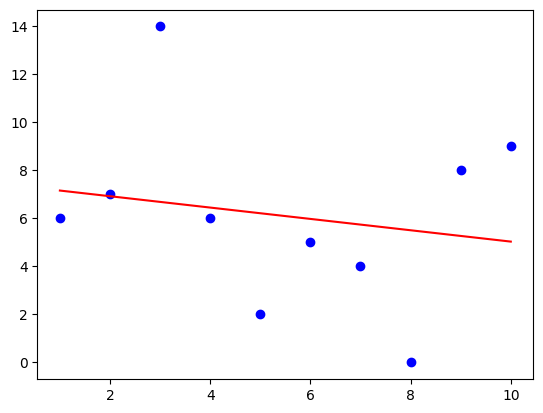

In [17]:
X = np.array([[x] for x in range(1,11)])
y = np.random.randint(20, size=10)

model = LinearRegression() 
model.fit(X, y) 
y_pred = model.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.show()

<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    Regresja wielomianowa
</h3>

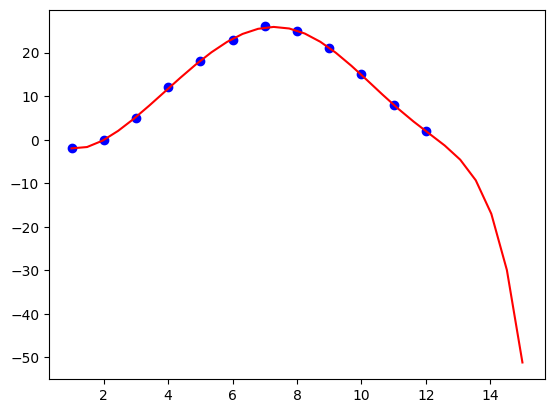

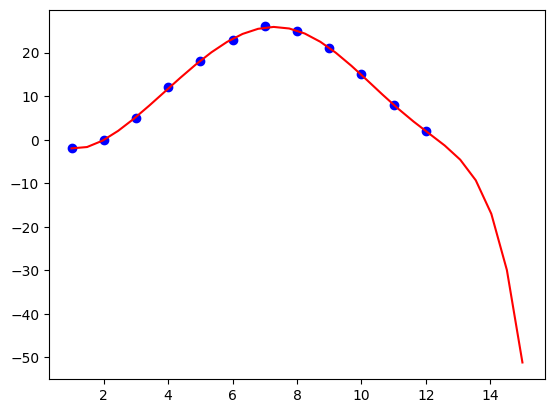

In [15]:
X = np.array([[i] for i in range(1, 13)]) 
y = np.array([-2, 0, 5, 12, 18, 23, 26, 25, 21, 15, 8, 2]) 
 
degree = 7 #stopień wielomianu - im wyższy tym lepsze dopasowanie
model = make_pipeline(PolynomialFeatures(degree), LinearRegression()) 
model.fit(X, y) 
X_test = np.linspace(1, 15, 30)
y_pred = model.predict(X_test.reshape(-1,1))

plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.show()

model = np.poly1d(np.polyfit(X.reshape(-1), y, 7))
line = np.linspace(1, 15, 30)
plt.scatter(X, y, color='blue')
plt.plot(line, model(line), color='red')
plt.show()

Bardzo dobrze widać przetrenowanie modelu.

<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    Regresja logistyczna
</h3>

<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    Regresja grzbietowa (Ridge)
</h3>

Szczególnie przydatna, gdy mamy do czynienia z wieloma korelującymi 
zmiennymi niezależnymi, które mogą prowadzić do nadmiernego dopasowania modelu. Poprzez ograniczenie wielkości współczynników (λ), regresja grzbietowa pomaga uniknąć zbyt skomplikowanych modeli, co może prowadzić do lepszej generalizacji i wyższej wydajności na danych testowych.

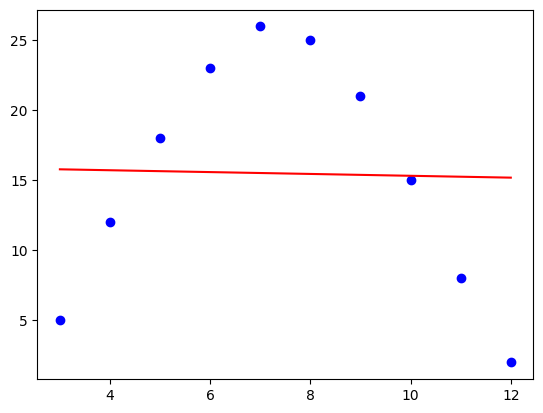

In [42]:
X = np.array([[i] for i in range(3, 13)]) 
y = np.array([5, 12, 18, 23, 26, 25, 21, 15, 8, 2]) 

alpha = 500  # Parametr regularyzacji 
model = Ridge(alpha=alpha) 
model.fit(X, y) 
y_pred = model.predict(X) 

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.show()
#nie rozumiem
#aha może przy większej liczbie wymiarów działałaby lepiej

<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    Regresja Lasso
</h3>

Użyteczna w przypadku dużych zbiorów danych, gdzie istnieje wiele zmiennych, z których wiele może być zbędnych lub silnie skorelowanych. Zastosowanie regresji Lasso prowadzi do rzadkiego modelu, co oznacza, że tylko wybrane zmienne są brane pod uwagę, a pozostałe mają współczynniki bliskie zeru. 

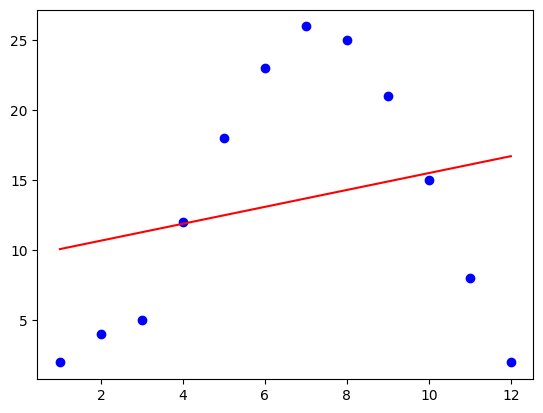

In [50]:
X = np.array([[i] for i in range(1, 13)]) 
y = np.array([2, 4, 5, 12, 18, 23, 26, 25, 21, 15, 8, 2]) 

alpha = 0.1  # Parametr regularyzacji 
model = Lasso(alpha=alpha) 
model.fit(X, y) 
y_pred = model.predict(X) 

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.show()
#tu pewnie tak jak wyżej

<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    Regresja Bayesowska
</h3>

W przeciwieństwie do klasycznych metod regresji, które dostarczają pojedyncze estymaty punktowe dla parametrów modelu, regresja Bayesowska dostarcza pełne rozkłady prawdopodobieństwa dla tych parametrów. Dzięki temu możliwe jest określenie nie tylko wartości oczekiwanej, ale również przedziałów ufności dla parametrów modelu, co pozwala na lepsze zrozumienie niepewności związanej z estymacją parametrów. 

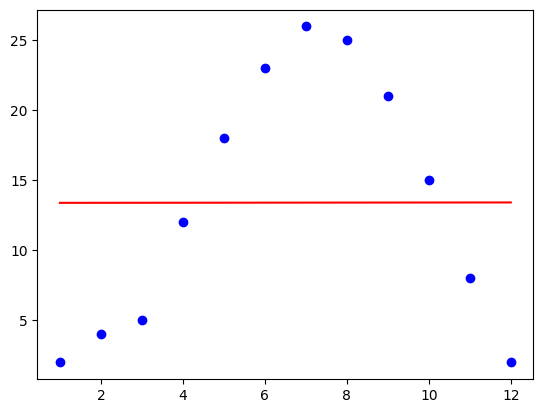

In [53]:
X = np.array([[i] for i in range(1, 13)]) 
y = np.array([2, 4, 5, 12, 18, 23, 26, 25, 21, 15, 8, 2]) 

model = BayesianRidge() 
model.fit(X, y) 
y_pred = model.predict(X) 

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.show()
#tu pewnie tak jak wyżej

<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    Elastyczna regresja net
</h3>

Łączy w sobie cechy regresji Lasso i grzbietowej, co czyni ją elastycznym narzędziem do analizy danych. Regresja elastyczna net umożliwia kontrolowanie zarówno nadmiernego dopasowania modelu (dzięki regularyzacji L2), jak i wybierania ważnych zmiennych (dzięki regularyzacji L1). Jest szczególnie użyteczna w przypadku dużych zbiorów danych, gdzie istnieje wiele zmiennych, z których wiele może być zbędnych lub silnie skorelowanych. Dzięki swojej elastyczności, regresja elastyczna net może prowadzić do bardziej stabilnych i lepiej uogólniających modeli niż pojedyncza regresja Lasso lub grzbietowa.

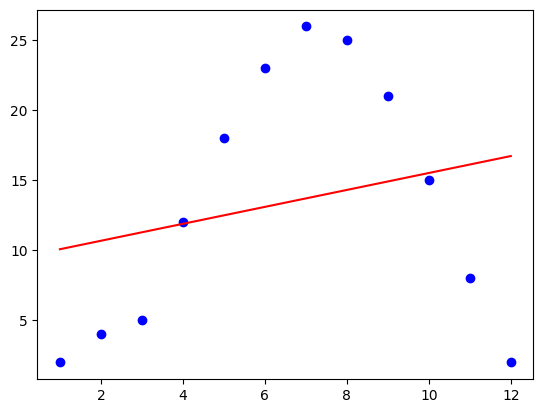

In [57]:
X = np.array([[i] for i in range(1, 13)]) 
y = np.array([2, 4, 5, 12, 18, 23, 26, 25, 21, 15, 8, 2]) 

alpha = 0.1  # Parametr regularyzacji 
l1_ratio = 0.5  # Proporcja kary L1 w stosunku do kary L2 
model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio) 
model.fit(X, y) 
y_pred = model.predict(X) 

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.show()
#tu pewnie tak jak wyżej

<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    Regresja SVR
</h3>

Główną cechą SVR jest zdolność do modelowania złożonych zależności nieliniowych między zmiennymi przy minimalnym ryzyku nadmiernego dopasowania modelu. SVR zakłada, że istnieje hiperpłaszczyzna w przestrzeni cech, która najlepiej separuje próbki z różnych klas. W przypadku regresji, SVR próbuje znaleźć hiperpłaszczyznę, która minimalizuje błąd dopasowania modelu do danych, jednocześnie zachowując margines separacji między przewidywanymi wartościami a rzeczywistymi danymi. Wykorzystuje tzw. jądra (kernele), które mapują dane do wyższych wymiarów, co pozwala na modelowanie nieliniowych zależności między zmiennymi.

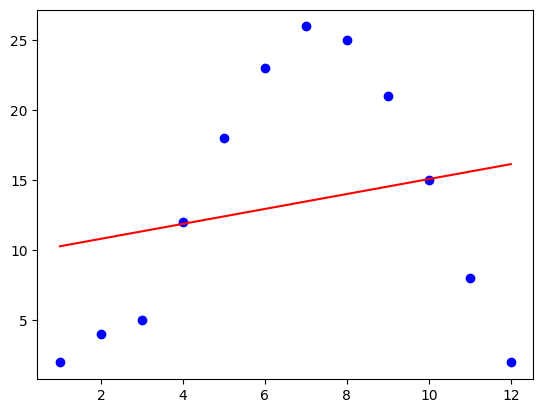

In [60]:
X = np.array([[i] for i in range(1, 13)]) 
y = np.array([2, 4, 5, 12, 18, 23, 26, 25, 21, 15, 8, 2]) 

model = SVR(kernel='linear') #są inne kernele
model.fit(X, y) 
y_pred = model.predict(X) 

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.show()
#tu pewnie tak jak wyżej

<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    Regresja kwantyli
</h3>

Regresja kwantyli jest techniką regresji, która modeluje kwantyle rozkładu zmiennej zależnej zamiast średniej. Jest przydatna, gdy interesują nas inne kwantyle rozkładu, a nie tylko średnia. 

<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    Regresja kubiczna
</h3>

Regresja kubiczna jest rozszerzeniem regresji wielomianowej, gdzie oprócz współczynników liniowych i kwadratowych dodaje się również współczynniki trzeciego stopnia. Pozwala modelować bardziej skomplikowane zależności między zmiennymi.

<h1 style='color:#FFB5D6;
    text-shadow: 2px 2px 2px #FACFE2;
    font-family:Georgia'>
    Zadania
</h1>

1. Napisz program w Pythonie, który wykorzystuje regresję liniową z scikit-learn do przewidywania cen mieszkań na podstawie danych o ich cechach (np. liczba pokoi, powierzchnia, piętro, lokalizacja). Dopasuj model do danych treningowych. Ocena modelu na zbiorze testowym za pomocą metryk takich jak średni błąd kwadratowy (MSE) lub współczynnik determinacji (R2). Zwizualizuj wyniki regresji na wykresie, porównując przewidywane wartości z rzeczywistymi. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   area                  10 non-null     int64
 1   rooms                 10 non-null     int64
 2   floor                 10 non-null     int64
 3   year_of_construction  10 non-null     int64
 4   price                 10 non-null     int64
dtypes: int64(5)
memory usage: 528.0 bytes
MSE:  12181987119.480537
R2:  0.8553513647046938


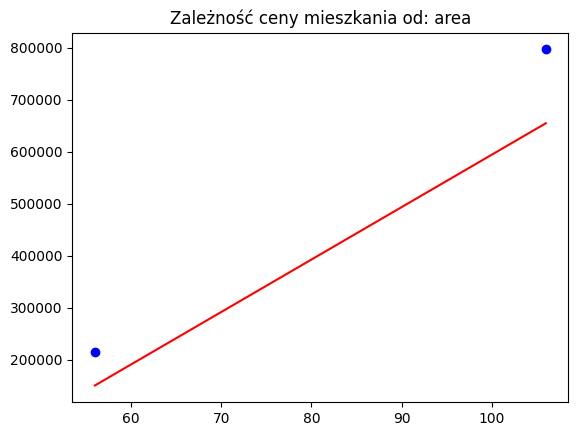

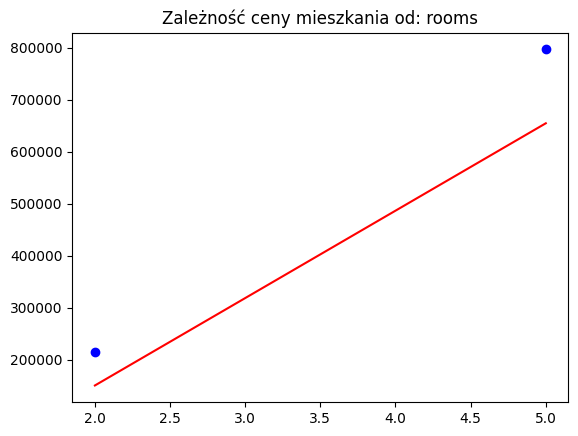

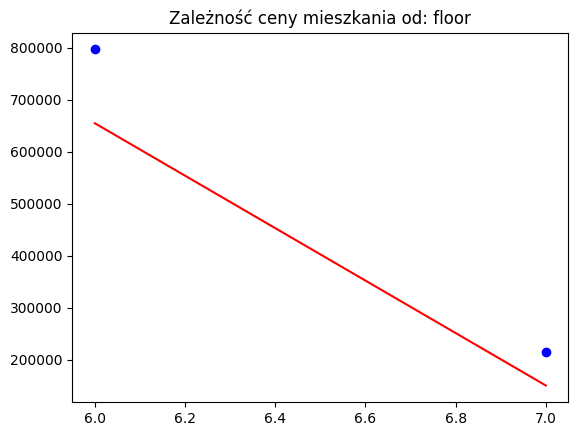

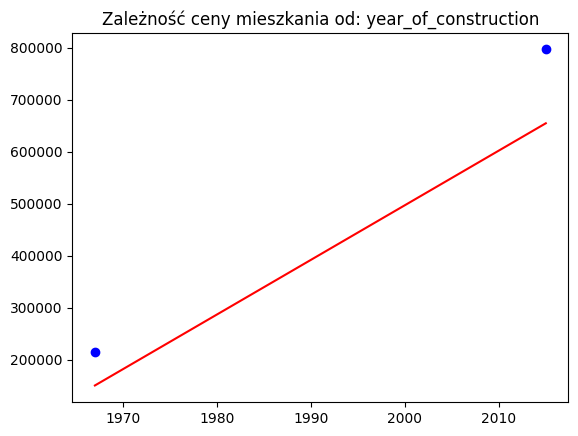

In [75]:
appartments = pd.read_csv('DaneRegresje/appartments.csv')
appartments.info() #danych jest mało i braków brak -> nie przetwarzamy

X = appartments.drop(['price'], axis=1)
y = appartments['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42) 
features = list(X.columns)

model = LinearRegression() 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred)) 

for f in features:
    plt.scatter(X_test[f], y_test, color='blue')
    plt.plot(X_test[f], y_pred, color='red')
    plt.title(f'Zależność ceny mieszkania od: {f}')
    plt.show()

#wysokie MSE przez wysokie ceny mieszkań 
#wysokie R2, więc git

2. Przy użyciu danych dotyczących temperatury i zużycia energii, zaimplementuj regresję grzbietową w Pythonie. Stwórz modele regresji grzbietowej i Lasso przy użyciu biblioteki scikit-learn. Dobierz odpowiednie wartości parametrów regularyzacji (alpha). Porównaj wyniki regresji z różnymi parametrami regularyzacji. Porównaj wyniki regresji z regresją liniową i zidentyfikuj, która metoda daje najlepsze wyniki. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time_n              1094 non-null   object 
 1   temperature         1094 non-null   float64
 2   energy_consumption  1094 non-null   float64
dtypes: float64(2), object(1)
memory usage: 25.8+ KB
- - - Ridge - - -
MSE dla alpha=0.1:  56.320472478587206
R2 dla alpha=0.1:  0.0502147275538255
- - - Lasso - - -
MSE dla alpha=0.1:  56.32106817838579
R2 dla alpha=0.1:  0.05020468170600878


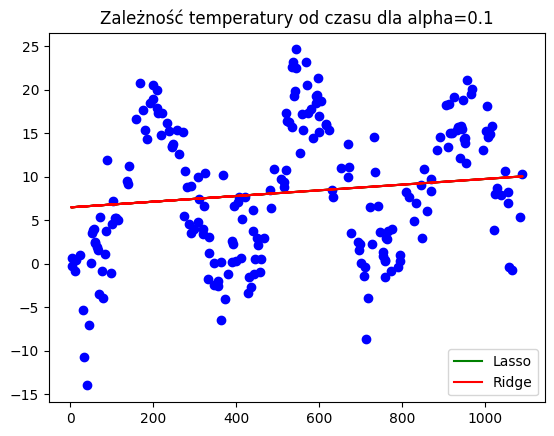

- - - Ridge - - -
MSE dla alpha=5:  56.32047258758192
R2 dla alpha=5:  0.05021472571574492
- - - Lasso - - -
MSE dla alpha=5:  56.35048738900215
R2 dla alpha=5:  0.049708557796873665


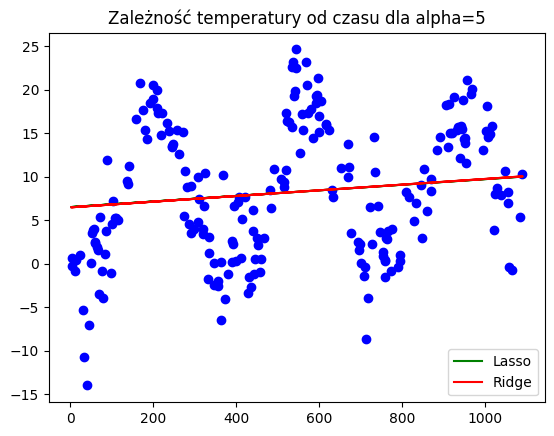

- - - Ridge - - -
MSE dla alpha=10:  56.320472698801
R2 dla alpha=10:  0.050214723840152464
- - - Lasso - - -
MSE dla alpha=10:  56.38097130468471
R2 dla alpha=10:  0.049194478761531935


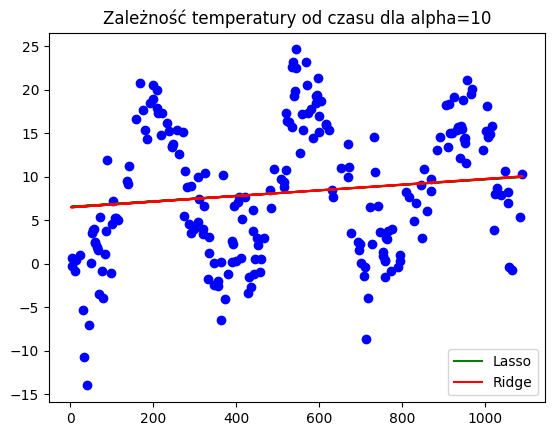

- - - Ridge - - -
MSE dla alpha=15:  56.32047281002009
R2 dla alpha=15:  0.050214721964560005
- - - Lasso - - -
MSE dla alpha=15:  56.41192422341049
R2 dla alpha=15:  0.0486724904853123


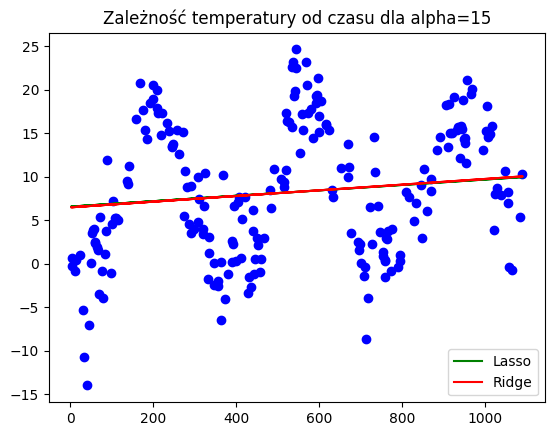

In [91]:
df = pd.read_csv('DaneRegresje/temperature_and_energy_consumption.csv')
df.info() #braków brak -> nie przetwarzamy

y = df['temperature']
X = np.linspace(1, len(df['time_n']), len(df['time_n']))
X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42) 

alpha = [0.1, 5, 10, 15]

for a in alpha:
    model = Lasso(alpha=a)
    model.fit(X_train, y_train) 
    yL_pred = model.predict(X_test)
    
    model = Ridge(alpha=a) 
    model.fit(X_train, y_train) 
    yR_pred = model.predict(X_test)

    print("- - - Ridge - - -")
    print(f"MSE dla alpha={a}: ", mean_squared_error(y_test, yR_pred))
    print(f"R2 dla alpha={a}: ", r2_score(y_test, yR_pred)) 

    print("- - - Lasso - - -")
    print(f"MSE dla alpha={a}: ", mean_squared_error(y_test, yL_pred))
    print(f"R2 dla alpha={a}: ", r2_score(y_test, yL_pred)) 
    
    plt.scatter(X_test, y_test, color='blue')
    plt.plot(X_test, yL_pred, color='green', label='Lasso')
    plt.plot(X_test, yR_pred, color='red', label='Ridge')
    plt.title(f'Zależność temperatury od czasu dla alpha={a}')
    plt.legend()
    plt.show()

#nie rozumiem
#jeśli to just linia to trochę głupio

3. Stwórz model regresji SVR przy użyciu biblioteki scikit-learn. Chcemy przewidywać czas przeżycia pacjentów na podstawie różnych cech zdrowia, takich jak wiek pacjenta, BMI, ciśnienie krwi, poziom glukozy we krwi, Cholesterol oraz poziom kreatyniny we krwi. Dobierz odpowiednie wartości parametrów kernela i regularyzacji (C). Porównaj wyniki regresji z różnymi parametrami kernela i regularyzacji. Porównaj wyniki regresji SVR z innymi metodami regresji i zidentyfikuj, która daje najlepsze wyniki. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wiek            100 non-null    int64  
 1   BMI             100 non-null    float64
 2   cisnienie_krwi  100 non-null    float64
 3   poziom_glukozy  100 non-null    float64
 4   cholesterol     100 non-null    float64
 5   kretynina       100 non-null    float64
 6   czas_przezycia  100 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 5.6 KB
MSE dla C=0.1:  47.536745833845764
R2 dla C=0.1:  -0.757205055502159
MSE dla C=0.5:  47.592069343651026
R2 dla C=0.5:  -0.7592500998023666
MSE dla C=1:  47.66772390842051
R2 dla C=1:  -0.7620466855036558
MSE dla C=5:  48.254966200212344
R2 dla C=5:  -0.7837542110366


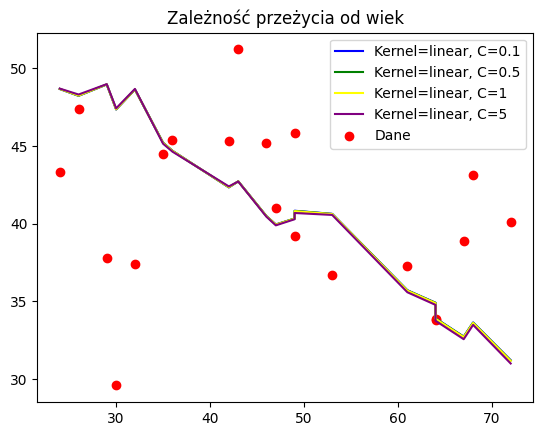

MSE dla C=0.1:  25.926933857617882
R2 dla C=0.1:  0.04160584724252092
MSE dla C=0.5:  35.6245998474271
R2 dla C=0.5:  -0.3168702622376365
MSE dla C=1:  37.944648439019886
R2 dla C=1:  -0.40263130966833494
MSE dla C=5:  42.65532789156323
R2 dla C=5:  -0.5767624918445811


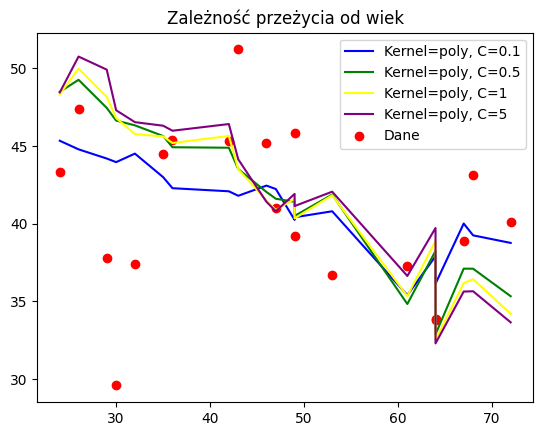

MSE dla C=0.1:  27.99341110715285
R2 dla C=0.1:  -0.03478188621014722
MSE dla C=0.5:  28.833617697646304
R2 dla C=0.5:  -0.06584028624539173
MSE dla C=1:  29.172844369322764
R2 dla C=1:  -0.07837986614247927
MSE dla C=5:  37.84516755379123
R2 dla C=5:  -0.39895397939712485


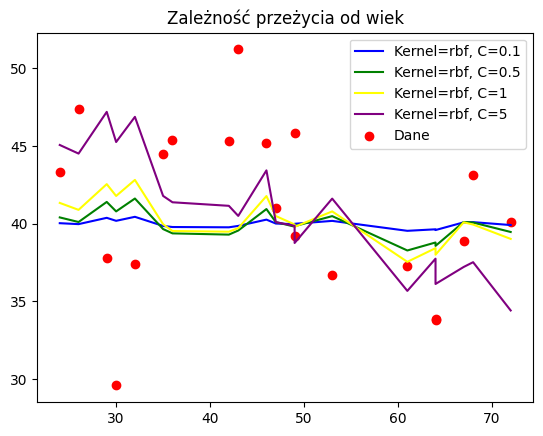

MSE dla C=0.1:  49.485394101967316
R2 dla C=0.1:  -0.8292372177394975
MSE dla C=0.5:  49.53383296437086
R2 dla C=0.5:  -0.8310277697094577
MSE dla C=1:  49.60050093889802
R2 dla C=1:  -0.8334921643545747
MSE dla C=5:  50.117796656360134
R2 dla C=5:  -0.8526141011630224


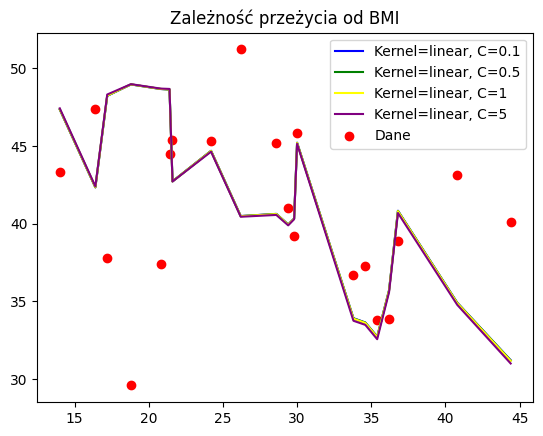

MSE dla C=0.1:  27.886486169744398
R2 dla C=0.1:  -0.030829385102265183
MSE dla C=0.5:  38.596356926047406
R2 dla C=0.5:  -0.4267218406466473
MSE dla C=1:  41.17910304687665
R2 dla C=1:  -0.5221935533394504
MSE dla C=5:  46.451571927411564
R2 dla C=5:  -0.7170913909877588


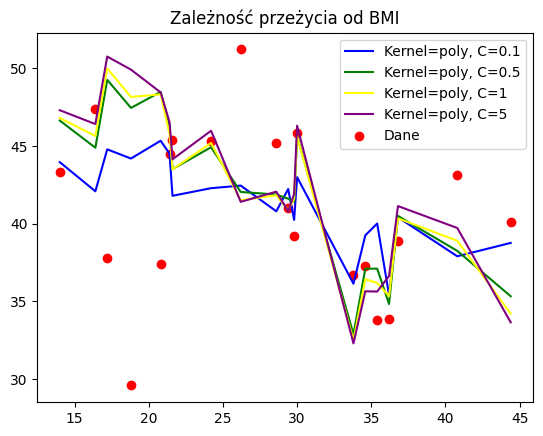

MSE dla C=0.1:  27.79132605274676
R2 dla C=0.1:  -0.027311772869091033
MSE dla C=0.5:  27.969864562067983
R2 dla C=0.5:  -0.03391148359135299
MSE dla C=1:  27.721905827135792
R2 dla C=1:  -0.02474564072735652
MSE dla C=5:  33.38454723740489
R2 dla C=5:  -0.23406628182467193


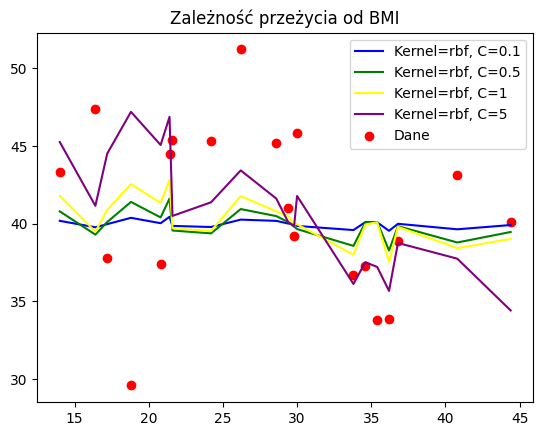

In [103]:
df = pd.read_csv('DaneRegresje/dane_medyczne.csv')
df.info() #braków brak -> nie przetwarzamy

X = df.drop(['czas_przezycia'], axis=1)
y = df['czas_przezycia']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42) 
features = list(X.columns)
features = features[:2]

kernel = ['linear', 'poly', 'rbf']
C = [0.1, 0.5, 1, 5]
color = ['blue','green','yellow','purple']

for f in features:
    sorted_idx = X_test[f].argsort()
    X_test = pd.DataFrame(X_test.iloc[sorted_idx])
    y_pred = y_pred[sorted_idx]
    for k in kernel:
        for idx, c in enumerate(C):
            model = SVR(kernel=k, C=c) 
            model.fit(X_train, y_train) 
            y_pred = model.predict(X_test)
        
            print(f"MSE dla C={c}: ", mean_squared_error(y_test, y_pred))
            print(f"R2 dla C={c}: ", r2_score(y_test, y_pred))
    
            plt.plot(X_test[f], y_pred, color=color[idx], label=f'Kernel={k}, C={c}')
        plt.scatter(X_test[f], y_test, color='red', label='Dane')
        plt.title(f'Zależność przeżycia od {f}')
        plt.legend()
        plt.show()

#wysokie MSE przez wysokie ceny mieszkań 
#wysokie R2, więc git

<h1 style='color:#FFB5D6;
    text-shadow: 2px 2px 2px #FACFE2;
    font-family:Georgia'>
    Tipy
</h1>

<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    Reshaping
</h3>

-1 oznacza "dopasuj tą liczbę wymiarów tak żeby się zgadzała"

In [28]:
X = np.array([i for i in range(1, 13)]) 
print(X)
print(X.reshape(-1,4))
print(X.reshape(-1,1))

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]]


<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    R2 score
</h3>

R2 pokazuje ile model wyjaśnia wariancji danych.
R2 score może być bardziej wiarygodny od MSE bo MSE będzie duże dla dużych danych i małe dla małych, a nie zawsze zaglądamy do ich środka i bo zwraca wartość niezależną od wielkości danych, na których działamy, podobne wyniki może dałoby się osiągnąć normalizaując dane.

- R2=1 to najlepszy model
- R2=0 to model zwracający zawsze średnie y
- R2<0 to model działający gorzej niz baseline